## Predict Test Score of Students

#### Import Relevant Libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
# import pandas_profiling as pp
import os
import csv
import sys

from collections import defaultdict, Counter

from sklearn.model_selection import train_test_split



%matplotlib inline

%reload_ext autoreload
%autoreload 2

sb.set_style("darkgrid")
sb.set()

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)

#### Data Collection and Loading

In [101]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Predict Test Scores of students\test_scores.csv")
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


#### Data Statistical Report

In [102]:
df.shape

(2133, 11)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
school             2133 non-null object
school_setting     2133 non-null object
school_type        2133 non-null object
classroom          2133 non-null object
teaching_method    2133 non-null object
n_student          2133 non-null float64
student_id         2133 non-null object
gender             2133 non-null object
lunch              2133 non-null object
pretest            2133 non-null float64
posttest           2133 non-null float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [104]:
df.describe().round()

,n_student,pretest,posttest
count,2133.0,2133.0,2133.0
mean,23.0,55.0,67.0
std,4.0,14.0,14.0
min,14.0,22.0,32.0
25%,20.0,44.0,56.0
50%,22.0,56.0,68.0
75%,27.0,65.0,77.0
max,31.0,93.0,100.0


In [105]:
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

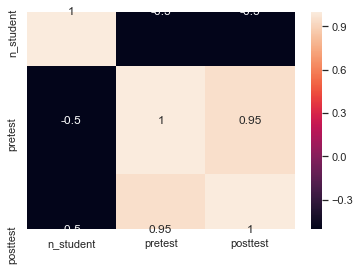

In [106]:
sb.heatmap(df.corr(), annot = True, )

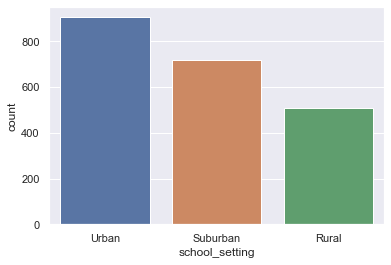

In [107]:
sb.countplot(df["school_setting"])

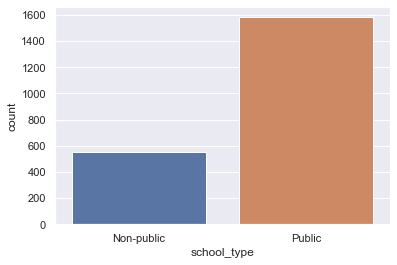

In [108]:
sb.countplot(df["school_type"])

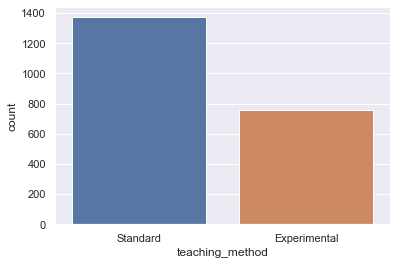

In [109]:
sb.countplot(df["teaching_method"])

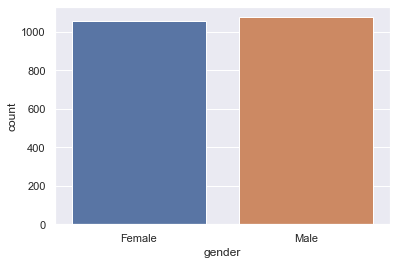

In [110]:
sb.countplot(df["gender"])

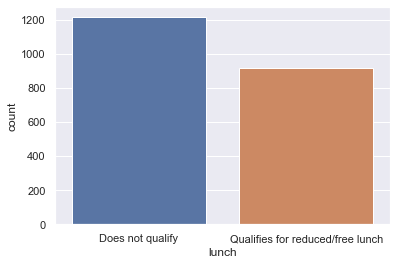

In [111]:
sb.countplot(df["lunch"])

In [112]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


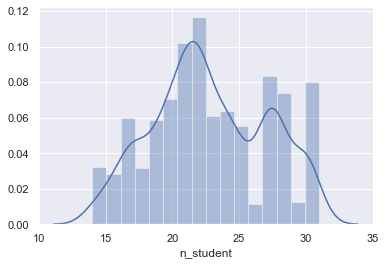

In [113]:
sb.distplot(df["n_student"])

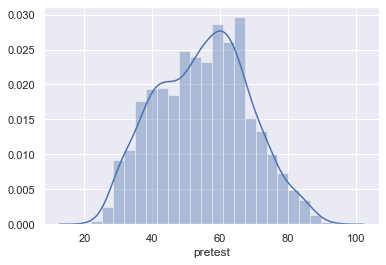

In [114]:
sb.distplot(df["pretest"])

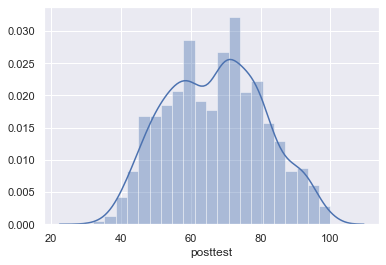

In [115]:
sb.distplot(df["posttest"])

In [116]:
# pp.ProfileReport(df)

In [117]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


#### Data Ingestion and Manipulation

In [118]:
fem_urb = df.groupby("gender")
fem = fem_urb.get_group("Female")
fem["teaching_method"].value_counts()

Standard        690
Experimental    366
Name: teaching_method, dtype: int64

In [119]:
filt = (df["school_setting"] == "Urban") & (df["lunch"] == "Does not qualify") & (df["gender"] == "Female")
j = 0
for i in df[filt].count():
    j = int(i) + 1
print("Total Rec:", j)
print()

df[filt].head()

Total Rec: 233



,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
5,ANKYI,Urban,Non-public,6OL,Standard,20.0,7YZO8,Female,Does not qualify,66.0,74.0
7,ANKYI,Urban,Non-public,6OL,Standard,20.0,9USQK,Female,Does not qualify,63.0,72.0


Calculate the Total scores of all test done, and grade accordingly

In [120]:
df["total"] = ((df["pretest"] + df["posttest"])/2).astype(int)
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,total
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0,67
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0,72
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0,70
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0,69
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0,70


In [123]:
def get_remark(data):
    for i in data['total']:
        if i >= 50:
            df['grade'] = 'pass'
        else:
            df['grade'] = 'fail'
        

df.sample(frac = 1).head(3)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,total
1969,ZMNYA,Suburban,Public,1UU,Experimental,24.0,VYPIZ,Male,Does not qualify,64.0,77.0,70
423,DNQDD,Suburban,Public,ST7,Standard,20.0,SPIWM,Female,Qualifies for reduced/free lunch,53.0,70.0,61
1293,QOQTS,Urban,Public,RK7,Standard,22.0,9TOAI,Female,Does not qualify,50.0,61.0,55


In [124]:
get_remark(df)

In [125]:
df.sample(frac = 1).head(3)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,total,grade
647,GOKXL,Rural,Public,TSA,Experimental,23.0,DZLHN,Female,Qualifies for reduced/free lunch,58.0,71.0,64,fail
477,FBUMG,Rural,Non-public,5LQ,Experimental,18.0,JC5I9,Female,Does not qualify,58.0,80.0,69,fail
941,KFZMY,Urban,Non-public,1VD,Experimental,27.0,C2UIR,Female,Does not qualify,45.0,61.0,53,fail


In [ ]:
df["grade"].value_counts()

In [126]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,total,grade
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0,67,fail
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0,72,fail
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0,70,fail
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0,69,fail
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0,70,fail


#### Building and Training Data